# Análisis del Presupuesto Funcional Gastos 2022 con pandas

## Instalar las librerías con las que vamos a trabajar 

Pandas es una librería estándar de python para el manejo de datos

In [5]:
!pip install pandas

## Configuración de Pandas

Importamos la librería pandas y la renombramos como "pd" para utilizarla en el resto del notebook

In [7]:
import pandas as pd

## Creación de variables

Creamos la variable que contiene los datos que vamos a usar mediante ```=``` 

In [42]:
url_movilidad = "http://datosabiertos.torrent.es/dataset/52cdc35c-6515-4aa8-953f-aeec7e131b16/resource/b16a1948-eb1a-47cf-ac16-1540f7bc13f5/download/ODTRPuntosMovilidadReducida.csv"

Comprobamos que la variable se ha creado 

In [43]:
url_movilidad

'http://datosabiertos.torrent.es/dataset/52cdc35c-6515-4aa8-953f-aeec7e131b16/resource/b16a1948-eb1a-47cf-ac16-1540f7bc13f5/download/ODTRPuntosMovilidadReducida.csv'

## Creación del Dataframe

Creamos un dataframe de pandas leyendo el csv de la base de datos 

Según la [documentación oficial de pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), un dataframe es una estructura de datos de dos dimensiones "de tamaño variable y potencialmente heterogéneos".

In [44]:
df = pd.read_csv(url_movilidad)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd3 in position 13: invalid continuation byte

Como muestra este error, no ha sido posible mostrar el dataframe porque no se ha podido decodificar un byte, "el byte de continuación no es válido"

Para solucionar este error, según [stack overflow](https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte) -un foro de programación en el que se resuelven dudas- era un problema de decodificación en utf-8 

UTF-8 según [wikipedia](https://es.wikipedia.org/wiki/UTF-8) "es un formato de codificación de caracteres"

Para resolver el error, era necesario añadir ````encoding='latin-1'````

Según [wikipedia](https://ca.wikipedia.org/wiki/Latin-1), latin-1 "es una norma de la ISO que define la codificación del alfabeto latino, incluyendo los diacríticos (como letras acentuadas, ñ, ç), y letras especiales (como ß, Ø), necesarios para la escritura de las lenguas originarias de Europa occidental".

In [30]:
df = pd.read_csv(url_movilidad, encoding='latin-1')

Añadiendo ````encoding='latin-1'```` ya es posible mostrar el dataframe

In [27]:
df

,TIPUS;DIRECCIÓ;NÚMERO;;
0,PMR;RAMIRO DE MAEZTU;7;;
1,PMR;6 DE DICIEMBRE;;;
2,PMR;AVDA AL VEDAT;29;;
3,PMR;VICENTE BLASCO IBAÑEZ;1;;
4,PMR;VIRGEN DE LA PAZ;11;;
...,...
177,PMR;TOLL LA ALBERCA;;;
178,PMR;TOLL LA ALBERCA;;;
179,PMR;VALENCIA;70;;
180,PMR;VIRGEN DEL OLIVAR;24;;


Como se puede observar, el csv no ha sido leído correctamente, ya que se muestra una única columna

Para separar los datos en columnas, añadimos ```delimiter``` -que sirve para delimitar los datos a partir de ```;```- como argumento 

In [36]:
df = pd.read_csv(url_movilidad, encoding='latin-1', delimiter = ';')

Comprobamos que ha funcionado

In [37]:
df

,TIPUS,DIRECCIÓ,NÚMERO,Unnamed: 3,Unnamed: 4
0,PMR,RAMIRO DE MAEZTU,7,NaN,NaN
1,PMR,6 DE DICIEMBRE,NaN,NaN,NaN
2,PMR,AVDA AL VEDAT,29,NaN,NaN
3,PMR,VICENTE BLASCO IBAÑEZ,1,NaN,NaN
4,PMR,VIRGEN DE LA PAZ,11,NaN,NaN
...,...,...,...,...,...
177,PMR,TOLL LA ALBERCA,NaN,NaN,NaN
178,PMR,TOLL LA ALBERCA,NaN,NaN,NaN
179,PMR,VALENCIA,70,NaN,NaN
180,PMR,VIRGEN DEL OLIVAR,24,NaN,NaN


## Cambio de base de datos

A pesar de que ahora los datos se dividan en columnas, parece que el csv no se termina de leer correctamente, por lo que no se puede analizar la tabla debidamente

Por ello, he decidido elegir otra base de datos, definiendo una nueva variable

In [46]:
url_prep = "https://datos.alcobendas.org/dataset/f4e12b31-2f87-4f37-877d-2ad7d7088e68/resource/e40b6eb5-a00f-4541-b8dd-74e36a493593/download/presupuesto-funcional-gastos-2022.-normalizado.csv"

Comprobamos que la variable se ha creado

In [47]:
url_prep

'https://datos.alcobendas.org/dataset/f4e12b31-2f87-4f37-877d-2ad7d7088e68/resource/e40b6eb5-a00f-4541-b8dd-74e36a493593/download/presupuesto-funcional-gastos-2022.-normalizado.csv'

## Creación de un nuevo dataframe

Una vez definida la nueva variable, creamos un nuevo dataframe de pandas leyendo la nueva base de datos 


In [48]:
df = pd.read_csv(url_prep)

A continuación mostramos el nuevo dataframe

In [49]:
df

,Código,Nombre,1: GASTOS DE PERSONAL,2: GASTOS CORRIENTES EN BIENES Y SERVICIOS,3: GASTOS FINANCIEROS,4: TRANSFERENCIAS CORRIENTES,5: FONDO DE CONTINGENCIA Y OTROS IMPREVISTOS,6: INVERSIONES REALES,7: TRANSFERENCIAS DE CAPITAL,8: ACTIVOS FINANCIEROS,9: PASIVOS FINANCIEROS
0,NaN,Clasificación por programas,77198659.02,73573032.97,613271.26,6294124.25,528.74,33174136.93,80000.0,195100.0,0
1,0.0,DEUDA PÚBLICA,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
2,1.0,Deuda Pública,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
3,11.0,Deuda Pública,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
4,1.0,SERVICIOS PÚBLICOS BÁSICOS,19082029.47,30794122.81,0.00,128000.00,0.00,18514157.84,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
130,94.0,Transferencias a otras Administraciones Públicas,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
131,941.0,Transferencias a Comunidades Autónomas,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
132,942.0,Transferencias a Entidades Locales territoriales,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
133,943.0,Transferencias a otras Entidades Locales,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0


## Exploración del dataframe

### Información general 

Mediante ```df.info()``` se muestra la información de la tabla 

Según la [página web de pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), muestra información sobre el dataframe entre la que incluye el índice (RangeIndex) con el número de entradas, el número de columnas que hay (Data Columns), el nombre de las columnas (Colum), la cantidad de datos nulos que posee la tabla (Non-Null Count), el tipo de variable de las columnas (Dtype) y el tamaño (memory usage)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Código                                        134 non-null    float64
 1   Nombre                                        135 non-null    object 
 2   1: GASTOS DE PERSONAL                         135 non-null    float64
 3   2: GASTOS CORRIENTES EN BIENES Y SERVICIOS    135 non-null    float64
 4   3: GASTOS FINANCIEROS                         135 non-null    float64
 5   4: TRANSFERENCIAS CORRIENTES                  135 non-null    float64
 6   5: FONDO DE CONTINGENCIA Y OTROS IMPREVISTOS  135 non-null    float64
 7   6: INVERSIONES REALES                         135 non-null    float64
 8   7: TRANSFERENCIAS DE CAPITAL                  135 non-null    float64
 9   8: ACTIVOS FINANCIEROS                        135 non-null    flo

### Cabecera

Mediante ```df.head()``` se muestran las primeras entradas de la tabla, entre paréntesis se pueden indicar cuántas entradas se quieren mostrar

In [51]:
df.head()

,Código,Nombre,1: GASTOS DE PERSONAL,2: GASTOS CORRIENTES EN BIENES Y SERVICIOS,3: GASTOS FINANCIEROS,4: TRANSFERENCIAS CORRIENTES,5: FONDO DE CONTINGENCIA Y OTROS IMPREVISTOS,6: INVERSIONES REALES,7: TRANSFERENCIAS DE CAPITAL,8: ACTIVOS FINANCIEROS,9: PASIVOS FINANCIEROS
0,NaN,Clasificación por programas,77198659.02,73573032.97,613271.26,6294124.25,528.74,33174136.93,80000.0,195100.0,0
1,0.0,DEUDA PÚBLICA,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
2,1.0,Deuda Pública,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
3,11.0,Deuda Pública,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
4,1.0,SERVICIOS PÚBLICOS BÁSICOS,19082029.47,30794122.81,0.00,128000.00,0.00,18514157.84,0.0,0.0,0


### Cola 

Ahora se muestran las últimas entradas de la tabla (tail) mediante ```df.tail()``` 

De nuevo, entre paréntesis se puede espeficiar el número de entradas que se quieren mostrar

In [54]:
df.tail()

,Código,Nombre,1: GASTOS DE PERSONAL,2: GASTOS CORRIENTES EN BIENES Y SERVICIOS,3: GASTOS FINANCIEROS,4: TRANSFERENCIAS CORRIENTES,5: FONDO DE CONTINGENCIA Y OTROS IMPREVISTOS,6: INVERSIONES REALES,7: TRANSFERENCIAS DE CAPITAL,8: ACTIVOS FINANCIEROS,9: PASIVOS FINANCIEROS
130,94.0,Transferencias a otras Administraciones Públicas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
131,941.0,Transferencias a Comunidades Autónomas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
132,942.0,Transferencias a Entidades Locales territoriales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
133,943.0,Transferencias a otras Entidades Locales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
134,944.0,Transferencias a la Administración General del...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Columnas

Se puede mostrar el nombre de las columnas de la tabla mediante ```df.columns```

In [60]:
df.columns

Index(['Código', 'Nombre', '1: GASTOS DE PERSONAL',
       '2: GASTOS CORRIENTES EN BIENES Y SERVICIOS', '3: GASTOS FINANCIEROS',
       '4: TRANSFERENCIAS CORRIENTES',
       '5: FONDO DE CONTINGENCIA Y OTROS IMPREVISTOS', '6: INVERSIONES REALES',
       '7: TRANSFERENCIAS DE CAPITAL', '8: ACTIVOS FINANCIEROS',
       '9: PASIVOS FINANCIEROS'],
      dtype='object')

También se pueden mostrar columnas en concreto mediante ```df['nombre de la columna']``` 

A continuación se ejemplifica con la columna "1: GASTOS DE PERSONAL"

In [57]:
df['1: GASTOS DE PERSONAL']

0      77198659.02
1             0.00
2             0.00
3             0.00
4      19082029.47
          ...     
130           0.00
131           0.00
132           0.00
133           0.00
134           0.00
Name: 1: GASTOS DE PERSONAL, Length: 135, dtype: float64

También se puede mostrar una fila en concreto de la columna especificada, añadiendo el número de dicha fila a contuación del nombre

In [59]:
df['1: GASTOS DE PERSONAL'][4]

19082029.47

### Mostramos las variables estadísticas

Mediante ```df_es.describe()``` se muestran las variables estadísticas del dataframe, algo que no se muestra normalmente

In [61]:
df.describe()

,Código,1: GASTOS DE PERSONAL,2: GASTOS CORRIENTES EN BIENES Y SERVICIOS,3: GASTOS FINANCIEROS,4: TRANSFERENCIAS CORRIENTES,5: FONDO DE CONTINGENCIA Y OTROS IMPREVISTOS,6: INVERSIONES REALES,7: TRANSFERENCIAS DE CAPITAL,8: ACTIVOS FINANCIEROS,9: PASIVOS FINANCIEROS
count,134.000000,1.350000e+02,1.350000e+02,135.000000,1.350000e+02,135.000000,1.350000e+02,135.000000,135.000000,135.0
mean,663.664179,2.307653e+06,2.268701e+06,18171.000296,1.881666e+05,15.666370,1.047493e+06,2370.370370,5780.740741,0.0
std,1180.397046,7.959743e+06,7.526748e+06,98585.496389,6.834606e+05,89.988814,3.767106e+06,13615.586295,33205.011077,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0
25%,133.250000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0
50%,333.500000,0.000000e+00,1.000000e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0
75%,491.750000,1.203482e+06,1.446545e+06,0.000000,3.000000e+03,0.000000,1.122241e+05,0.000000,0.000000,0.0
max,9231.000000,7.719866e+07,7.357303e+07,613271.260000,6.294124e+06,528.740000,3.317414e+07,80000.000000,195100.000000,0.0


### Indexar el dataframe según una columna

También es posible indexar -ordenar los datos- en función de una columna mediante ```df.set_index('')```

En este caso, se indexa el dataframe según la columna "Nombre"

In [64]:
df.set_index('Nombre')

,Código,1: GASTOS DE PERSONAL,2: GASTOS CORRIENTES EN BIENES Y SERVICIOS,3: GASTOS FINANCIEROS,4: TRANSFERENCIAS CORRIENTES,5: FONDO DE CONTINGENCIA Y OTROS IMPREVISTOS,6: INVERSIONES REALES,7: TRANSFERENCIAS DE CAPITAL,8: ACTIVOS FINANCIEROS,9: PASIVOS FINANCIEROS
Nombre,,,,,,,,,,
Clasificación por programas,NaN,77198659.02,73573032.97,613271.26,6294124.25,528.74,33174136.93,80000.0,195100.0,0
DEUDA PÚBLICA,0.0,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
Deuda Pública,1.0,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
Deuda Pública,11.0,0.00,0.00,15000.00,0.00,0.00,0.00,0.0,0.0,0
SERVICIOS PÚBLICOS BÁSICOS,1.0,19082029.47,30794122.81,0.00,128000.00,0.00,18514157.84,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
Transferencias a otras Administraciones Públicas,94.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
Transferencias a Comunidades Autónomas,941.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
Transferencias a Entidades Locales territoriales,942.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0


In [67]:
df.set_index('Nombre')['1: GASTOS DE PERSONAL']

Nombre
Clasificación por programas                              77198659.02
DEUDA PÚBLICA                                                   0.00
Deuda Pública                                                   0.00
Deuda Pública                                                   0.00
SERVICIOS PÚBLICOS BÁSICOS                               19082029.47
                                                            ...     
Transferencias a otras Administraciones Públicas                0.00
Transferencias a Comunidades Autónomas                          0.00
Transferencias a Entidades Locales territoriales                0.00
Transferencias a otras Entidades Locales                        0.00
Transferencias a la Administración General del Estado           0.00
Name: 1: GASTOS DE PERSONAL, Length: 135, dtype: float64

### Creación de un gráfico a partir de "Nombre" y "1: GASTOS DE PERSONAL"

Una vez indexados los datos según "Nombre" y "1: GASTOS DE PERSONAL", mediante ```.plot``` se muestran los datos en un gráfico

Añadiendo ```title=``` como argumento de ```.plot``` se pone un título al gráfico

<AxesSubplot:title={'center':'Gastos de personal'}, xlabel='Nombre'>

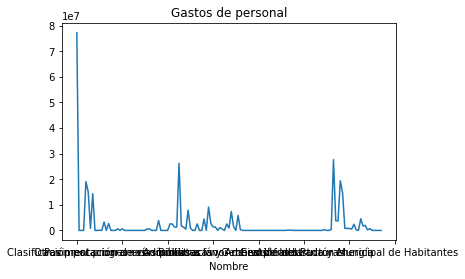

In [69]:
df.set_index('Nombre')['1: GASTOS DE PERSONAL'].plot(title="Gastos de personal")

Debido a la longitud de las etiquetas de "Nombre" no se puede distinguir bien a qué nombre corresponde cada dato del gráfico

### Creación de otro gráfico a partir de "Nombre" y "3: GASTOS FINANCIEROS"

En esta ocasión se va a indexar el dataframe según "Nombre" y "3: GASTOS FINANCIEROS"

In [70]:
df.set_index('Nombre')['3: GASTOS FINANCIEROS']

Nombre
Clasificación por programas                              613271.26
DEUDA PÚBLICA                                             15000.00
Deuda Pública                                             15000.00
Deuda Pública                                             15000.00
SERVICIOS PÚBLICOS BÁSICOS                                    0.00
                                                           ...    
Transferencias a otras Administraciones Públicas              0.00
Transferencias a Comunidades Autónomas                        0.00
Transferencias a Entidades Locales territoriales              0.00
Transferencias a otras Entidades Locales                      0.00
Transferencias a la Administración General del Estado         0.00
Name: 3: GASTOS FINANCIEROS, Length: 135, dtype: float64

### Creación de un gráfico a partir de "Nombre" y "3: GASTOS FINANCIEROS"

Una vez indexados los datos según "Nombre" y "3: GASTOS FINANCIEROS", mediante ```.plot``` se muestran los datos en un gráfico

Además, al igual que anteriormente, añadiendo ```title=``` como argumento de ```.plot``` se pone un título al gráfico

<AxesSubplot:title={'center':'Gastos financieros'}, xlabel='Nombre'>

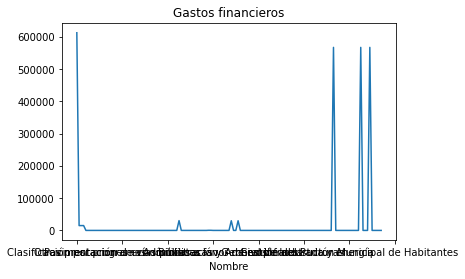

In [71]:
df.set_index('Nombre')['3: GASTOS FINANCIEROS'].plot(title="Gastos financieros")

Al igual que en el anterior gráfico, debido a la longitud de las etiquetas de "Nombre" no se puede distinguir bien a qué nombre corresponde cada dato del gráfico

### Comparación de Gastos de personal y Gastos financieros

A continuación se van a comparar los Gastos de personal y Gastos financieros en base al nombre

Para ello se deben definir dos nuevas variables, una para cada gasto

In [72]:
gastos_pers = df.set_index('Nombre')['1: GASTOS DE PERSONAL']
gastos_fin = df.set_index('Nombre')['3: GASTOS FINANCIEROS']

Antes de crear un dataframe y un gráfico con estos datos, es necesario concatearlos mediante ```vs```

In [73]:
vs = pd.concat([gastos_pers,gastos_fin],axis=1)
vs

,1: GASTOS DE PERSONAL,3: GASTOS FINANCIEROS
Nombre,,
Clasificación por programas,77198659.02,613271.26
DEUDA PÚBLICA,0.00,15000.00
Deuda Pública,0.00,15000.00
Deuda Pública,0.00,15000.00
SERVICIOS PÚBLICOS BÁSICOS,19082029.47,0.00
...,...,...
Transferencias a otras Administraciones Públicas,0.00,0.00
Transferencias a Comunidades Autónomas,0.00,0.00
Transferencias a Entidades Locales territoriales,0.00,0.00


### Creación de un gráfico de comparación

Una vez concatenados los datos de ambos gastos, se puede crear un gráfico con ellos

<AxesSubplot:title={'center':'Gastos de personal vs gastos financieros'}, xlabel='Nombre'>

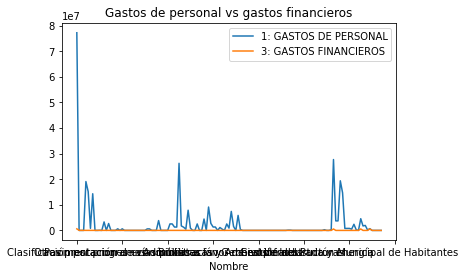

In [74]:
vs.columns =['1: GASTOS DE PERSONAL', '3: GASTOS FINANCIEROS']
vs.plot(title="Gastos de personal vs gastos financieros")

### Guardamos en un csv

Ahora guardamos todo lo visto en un archivo csv

In [76]:
vs.to_csv('gastos.csv')

Comprobamos que el archivo se ha creado con ```ls```, y como este es un comando de bash, se pone ```!``` para poder usarlo

In [77]:
!ls

api-pandas-folium.ipynb  probando-con-r.ipynb		  Shared_Resources
escit.png		 python-api-covid19-pandas.ipynb  Untitled.ipynb
esvit.csv		 python-pruebas.ipynb
gastos.csv		 seaborn-data


Importamos matplotlib.pyplot y lo redefinimos como plt

También uardamos el gráfico 

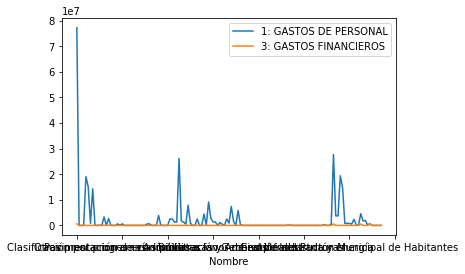

In [78]:
import matplotlib.pyplot as plt
vs.plot()
plt.savefig('gastos.png')